# Network inference of categorical variables: non-sequential data

In [1]:
import sys
import numpy as np
from scipy import linalg
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline

import inference

In [2]:
# setting parameter:
np.random.seed(1)

n = 20 # number of positions
m = 5 # number of values at each position
l = int(1*((n*m)**2)) # number of samples
g = 2.

sp = 0.5 # degree of sparsity
nm = n*m

In [3]:
w_true = inference.generate_interactions(n,m,g,sp)

In [4]:
h0_true = inference.generate_external_local_field(n,m,g)

In [5]:
s = inference.generate_sequences(w_true,h0_true,n,m,l)

('irepeat:', 0)
('irepeat:', 20)
('irepeat:', 40)
('irepeat:', 60)
('irepeat:', 80)


In [6]:
def itab(n,m):    
    i1 = np.zeros(n)
    i2 = np.zeros(n)
    for i in range(n):
        i1[i] = i*m
        i2[i] = (i+1)*m

    return i1.astype(int),i2.astype(int)

In [7]:
#w,h0 = inference.fit_multiplicative(s,n,m)
w,h0 = inference.fit_additive(s,n,m)

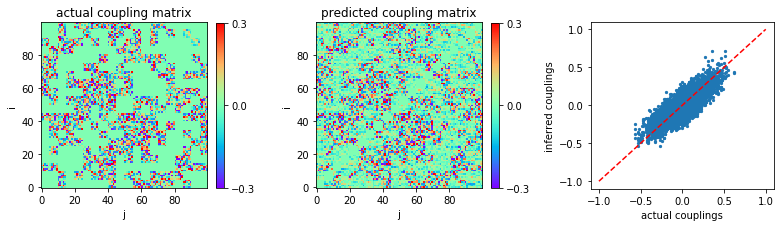

In [8]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w_true,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.3,0.3)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.3,0,0.3])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.3,0.3)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.3,0,0.3])

plt.subplot2grid((1,3),(0,2))
plt.plot([-1.,1.],[-1.,1.],'r--')
plt.scatter(w_true,w,marker='o',s=5)
plt.xlabel('actual couplings')
plt.ylabel('inferred couplings')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

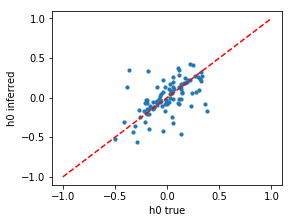

In [9]:
plt.figure(figsize=(11,3.2))
plt.subplot2grid((1,3),(0,0))

plt.plot([-1.,1.],[-1.,1.],'r--')
plt.scatter(h0_true,h0,marker='o',s=10)
plt.xlabel('h0 true')
plt.ylabel('h0 inferred')
plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [10]:
ds = s - s.mean(axis=0)
c_true = np.cov(ds,rowvar=False,bias=True)
print(c_true)

[[ 1.6432671e-01 -4.0299120e-02 -4.1335620e-02 ... -1.0291000e-04
   1.3411700e-03 -2.6074500e-03]
 [-4.0299120e-02  1.5660864e-01 -3.8763360e-02 ...  5.0552000e-04
   1.4837600e-03 -1.4436000e-03]
 [-4.1335620e-02 -3.8763360e-02  1.5963964e-01 ...  3.4720200e-03
  -3.5017400e-03 -7.7610000e-04]
 ...
 [-1.0291000e-04  5.0552000e-04  3.4720200e-03 ...  1.5184311e-01
  -3.6798570e-02 -3.8553550e-02]
 [ 1.3411700e-03  1.4837600e-03 -3.5017400e-03 ... -3.6798570e-02
   1.5825159e-01 -4.0701150e-02]
 [-2.6074500e-03 -1.4436000e-03 -7.7610000e-04 ... -3.8553550e-02
  -4.0701150e-02  1.6385775e-01]]


In [11]:
# simulate data from inferred values of w and h0:
s_sim = inference.generate_sequences(w,h0,n,m,l)

('irepeat:', 0)
('irepeat:', 20)
('irepeat:', 40)
('irepeat:', 60)
('irepeat:', 80)


In [12]:
ds_sim = s_sim - s_sim.mean(axis=0)
c_sim = np.cov(ds_sim,rowvar=False,bias=True)
print(c_sim)

[[ 1.6653679e-01 -4.1248940e-02 -4.1354490e-02 ...  4.4204000e-04
   9.3887000e-04 -1.2920500e-03]
 [-4.1248940e-02  1.5721884e-01 -3.8278860e-02 ...  1.0245600e-03
   3.3521800e-03 -1.9087000e-03]
 [-4.1354490e-02 -3.8278860e-02  1.5752319e-01 ...  1.6327600e-03
  -3.5469700e-03 -1.1645000e-04]
 ...
 [ 4.4204000e-04  1.0245600e-03  1.6327600e-03 ...  1.4989104e-01
  -3.6407880e-02 -3.9565800e-02]
 [ 9.3887000e-04  3.3521800e-03 -3.5469700e-03 ... -3.6407880e-02
   1.5897711e-01 -4.2733650e-02]
 [-1.2920500e-03 -1.9087000e-03 -1.1645000e-04 ... -3.9565800e-02
  -4.2733650e-02  1.6905975e-01]]


In [13]:
def itab(n,m):    
    i1 = np.zeros(n)
    i2 = np.zeros(n)
    for i in range(n):
        i1[i] = i*m
        i2[i] = (i+1)*m

    return i1.astype(int),i2.astype(int)

In [14]:
# remove covariance at the same positions
i1tab,i2tab = itab(n,m)
for i in range(n):
    i1,i2 = i1tab[i],i2tab[i]     
    c_true[i1:i2,i1:i2] = 0. 
    c_sim[i1:i2,i1:i2] = 0. 

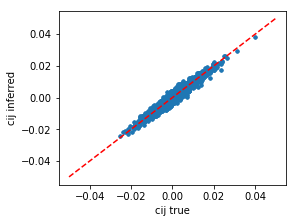

In [15]:
plt.figure(figsize=(11,3.2))
plt.subplot2grid((1,3),(0,0))

plt.plot([-0.05,0.05],[-0.05,0.05],'r--')
plt.scatter(c_true,c_sim,marker='o',s=10)
plt.xlabel('cij true')
plt.ylabel('cij inferred')
plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [16]:
# compare h0
for i in range(n):
    i1,i2 = i1tab[i],i2tab[i]     
    h0[i1:i2] = h0[i1:i2] - h0[i1:i2].mean()
    h0_true[i1:i2] = h0_true[i1:i2] - h0_true[i1:i2].mean()

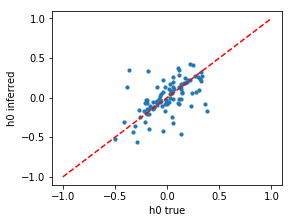

In [17]:
plt.figure(figsize=(11,3.2))
plt.subplot2grid((1,3),(0,0))

plt.plot([-1.,1.],[-1.,1.],'r--')
plt.scatter(h0_true,h0,marker='o',s=10)
plt.xlabel('h0 true')
plt.ylabel('h0 inferred')
plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()